Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
data = pd.read_csv('Nigeria_1997-2024_Sep20.csv')

Data Exploration

In [3]:
# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
  event_id_cnty  event_date  year  time_precision           disorder_type  \
0      NIG38575  2024-09-20  2024               1          Demonstrations   
1      NIG38585  2024-09-20  2024               2          Demonstrations   
2      NIG38581  2024-09-19  2024               1          Demonstrations   
3      NIG38588  2024-09-19  2024               1  Strategic developments   
4      NIG38591  2024-09-19  2024               1          Demonstrations   

               event_type         sub_event_type  \
0                Protests       Peaceful protest   
1                Protests       Peaceful protest   
2                Protests       Peaceful protest   
3  Strategic developments  Disrupted weapons use   
4                Protests       Peaceful protest   

                             actor1                   assoc_actor_1  inter1  \
0              Protesters (Nigeria)         Refugees/IDPs (Nigeria)       6   
1              Protesters (Nigeria)

In [4]:
# Check data types and missing values
print("\nSummary of dataset information:")
print(data.info())



Summary of dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38076 entries, 0 to 38075
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       38076 non-null  object 
 1   event_date          38076 non-null  object 
 2   year                38076 non-null  int64  
 3   time_precision      38076 non-null  int64  
 4   disorder_type       38076 non-null  object 
 5   event_type          38076 non-null  object 
 6   sub_event_type      38076 non-null  object 
 7   actor1              38076 non-null  object 
 8   assoc_actor_1       10199 non-null  object 
 9   inter1              38076 non-null  int64  
 10  actor2              29525 non-null  object 
 11  assoc_actor_2       8803 non-null   object 
 12  inter2              38076 non-null  int64  
 13  interaction         38076 non-null  int64  
 14  civilian_targeting  14964 non-null  object 
 15  iso                 

In [5]:
# Check for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         27877
inter1                    0
actor2                 8551
assoc_actor_2         29273
inter2                    0
interaction               0
civilian_targeting    23112
iso                       0
region                    0
country                   0
admin1                    1
admin2                    1
admin3                38076
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  30562
timestamp                 0
dtype: int64


Handling Missing Values

In [6]:
# Filling missing numerical values with the mean
numerical_columns = ['fatalities', 'latitude', 'longitude']  # Add more numerical columns as needed
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [7]:
# Filling missing categorical values with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

Exploratory Data Analysis (EDA)

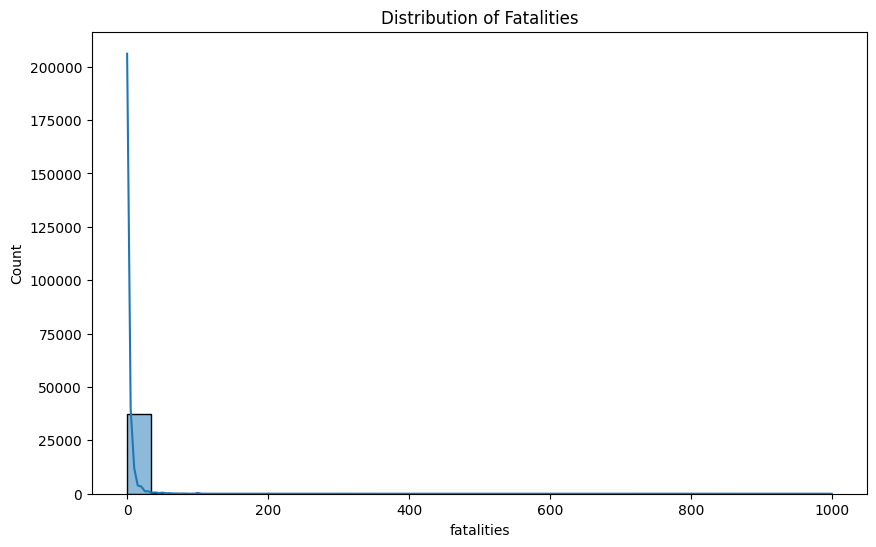

In [8]:
# Distribution of 'fatalities' column
plt.figure(figsize=(10, 6))
sns.histplot(data['fatalities'], kde=True, bins=30)
plt.title('Distribution of Fatalities')
plt.show()

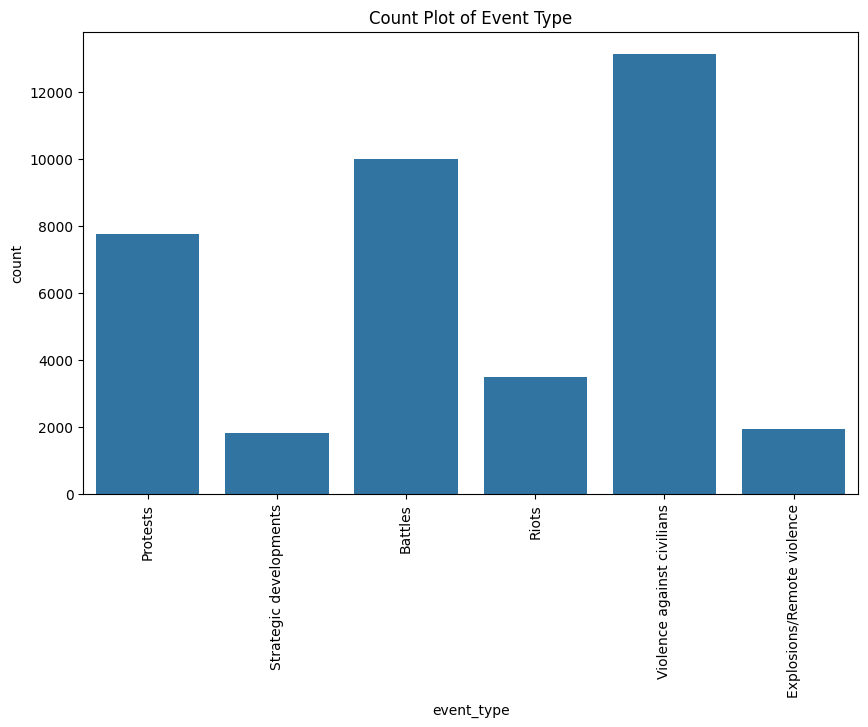

In [9]:
#Count plot of 'event_type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='event_type', data=data)
plt.title('Count Plot of Event Type')
plt.xticks(rotation=90)
plt.show()

Feature Selection

In [10]:
# Dropping columns that are not needed for the model
drop_columns = ['event_id_cnty', 'event_date', 'notes', 'timestamp']  # Adjust drop columns based on importance
X = data.drop(drop_columns + ['event_type'], axis=1)  # Features
y = data['event_type']  # Target variable

Train-Test Split

In [11]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [15]:
numerical_features = X_train.select_dtypes(include=np.number).columns
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

# Using RandomForestClassifier for demonstration purposes
model = RandomForestClassifier(random_state=42)
model.fit(X_train_numerical, y_train)

RandomForestClassifier(random_state=42)

Model Prediction

In [19]:
# Predicting on the test data
y_pred = model.predict(X_test_numerical)

Model Evaluation


Accuracy of the model:
0.9294905462184874

Confusion Matrix:


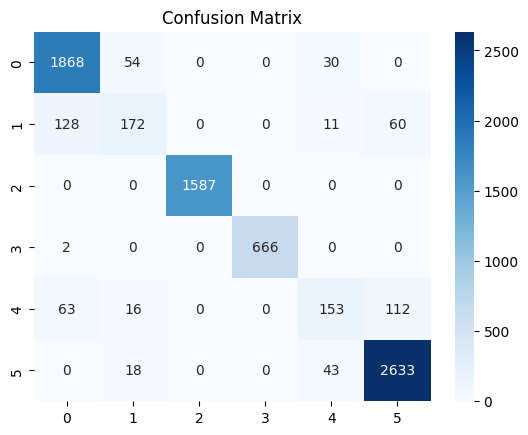

In [21]:
# Checking accuracy, confusion matrix, and classification report
print("\nAccuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                            precision    recall  f1-score   support

                   Battles       0.91      0.96      0.93      1952
Explosions/Remote violence       0.66      0.46      0.55       371
                  Protests       1.00      1.00      1.00      1587
                     Riots       1.00      1.00      1.00       668
    Strategic developments       0.65      0.44      0.53       344
Violence against civilians       0.94      0.98      0.96      2694

                  accuracy                           0.93      7616
                 macro avg       0.86      0.81      0.83      7616
              weighted avg       0.92      0.93      0.92      7616



Saving the Cleaned Data

In [28]:
# Saving the cleaned dataset to a new CSV file
data.to_csv('cleaned_crime_data.csv', index=False)